# Clustering

In [1]:
#KMeans: En yakın komşu kümelemesi

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#pembe uyarıları kapatmak için
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_excel("cars.xls")

In [4]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
from sklearn.cluster import KMeans  #en yakın komşu demek,verilerin benzerliklerine göre en yakın komşusınu buluyor,vektöre çevirip en yakın uzaklıkları bularak çalışıyor
from sklearn.metrics import silhouette_score  #KMeans in başarı oranını hesaplayan kod


In [6]:
x=df[['Price','Mileage','Cylinder']]
#fiyat mill ve cilindir sayısına göre kümeleme yapacağız.

In [7]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [8]:
model=KMeans(4)  #benzerliklerine göre 4 gruba ayıracağımızı tahmin ediyoruz

In [9]:
model=model.fit(x) #sadece x var y yok Clustering özelliği bu ,fit ile model öğrendi 

In [10]:
tahmin=model.predict(x)  #arabaaları benzerliklerine göre 4 grupta tahmin etti

In [11]:
tahmin

array([1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 0, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 0, 3, 0, 3,
       3, 0, 3, 3, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3,
       3, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,

In [12]:
silhouette_score(x,tahmin)

0.41328609226313495

In [13]:
x['cluster']=tahmin  #x in içnde yeni bir sütun açıp 'cluster' diye isimlendiriyoruz

In [14]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,1
1,17542.036083,9135,6,1
2,16218.847862,13196,6,1
3,16336.913140,16342,6,1
4,16339.170324,19832,6,3


Text(0, 0.5, 'FİYAT')

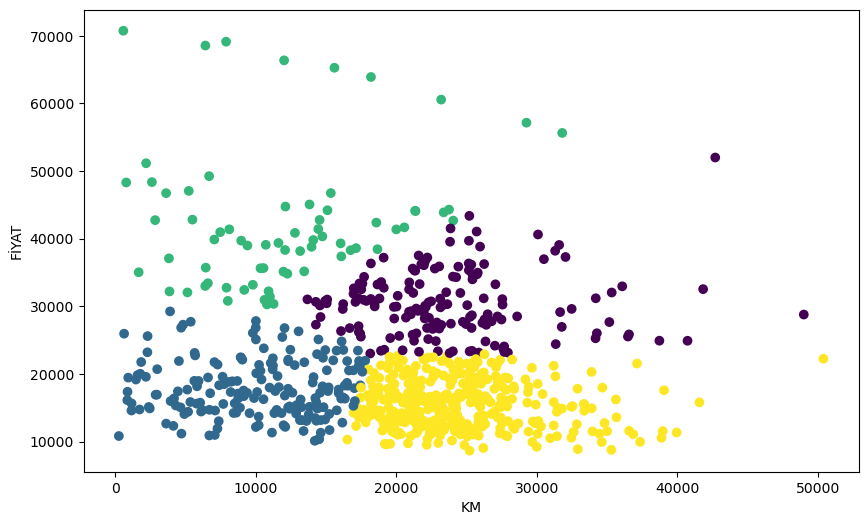

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage,x.Price,c=tahmin); #x in içindeki km ve fiyata göre 4 grupta tahminin grafiği, c= color
plt.xlabel("KM")
plt.ylabel("FİYAT")

In [16]:
wcss=[]  #uzaklık
for i in range(1,10):            #veriyi en az ikiye ayırıyoruz ki gruplama olsun o yüzden 1 den başladık. 0 birinci grup
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
    #en optimum 

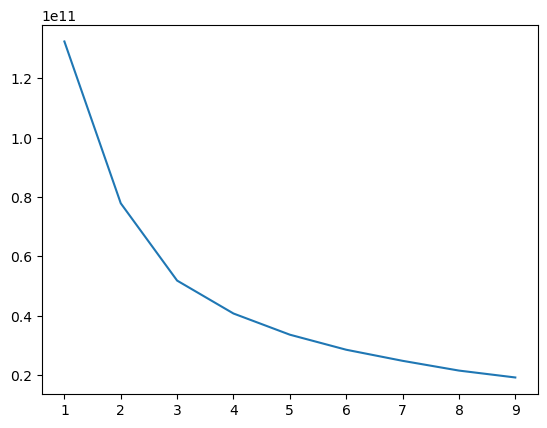

In [17]:
plt.plot(range(1,10),wcss)
#elbow dirsek metodu

In [18]:
#pip install yellowbrick  ---veri görselleştirmeyi daha güzel yapan paket

In [19]:
from yellowbrick.cluster import KElbowVisualizer

In [20]:
km=KMeans()

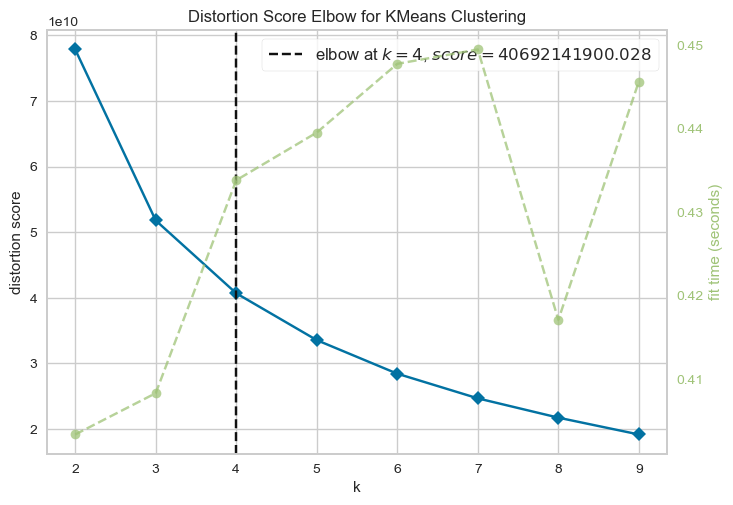

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
visualizer=KElbowVisualizer(km,k=(2,10))
visualizer.fit(x)
visualizer.show()
# 4 gruba ayırmann en ideal olduğunu gösteren grafiği çıkarıyor

# Hierarchical Clustering- Hiyerarşi-ikinci bir gruplama

In [22]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [23]:
data=linkage(x,method='ward',metric='euclidean')

#ward = en optimimu bulmaya yarıyor hatayı minimize ediyor
#euclidean = uzaklıkları ölçmeye yarıyor

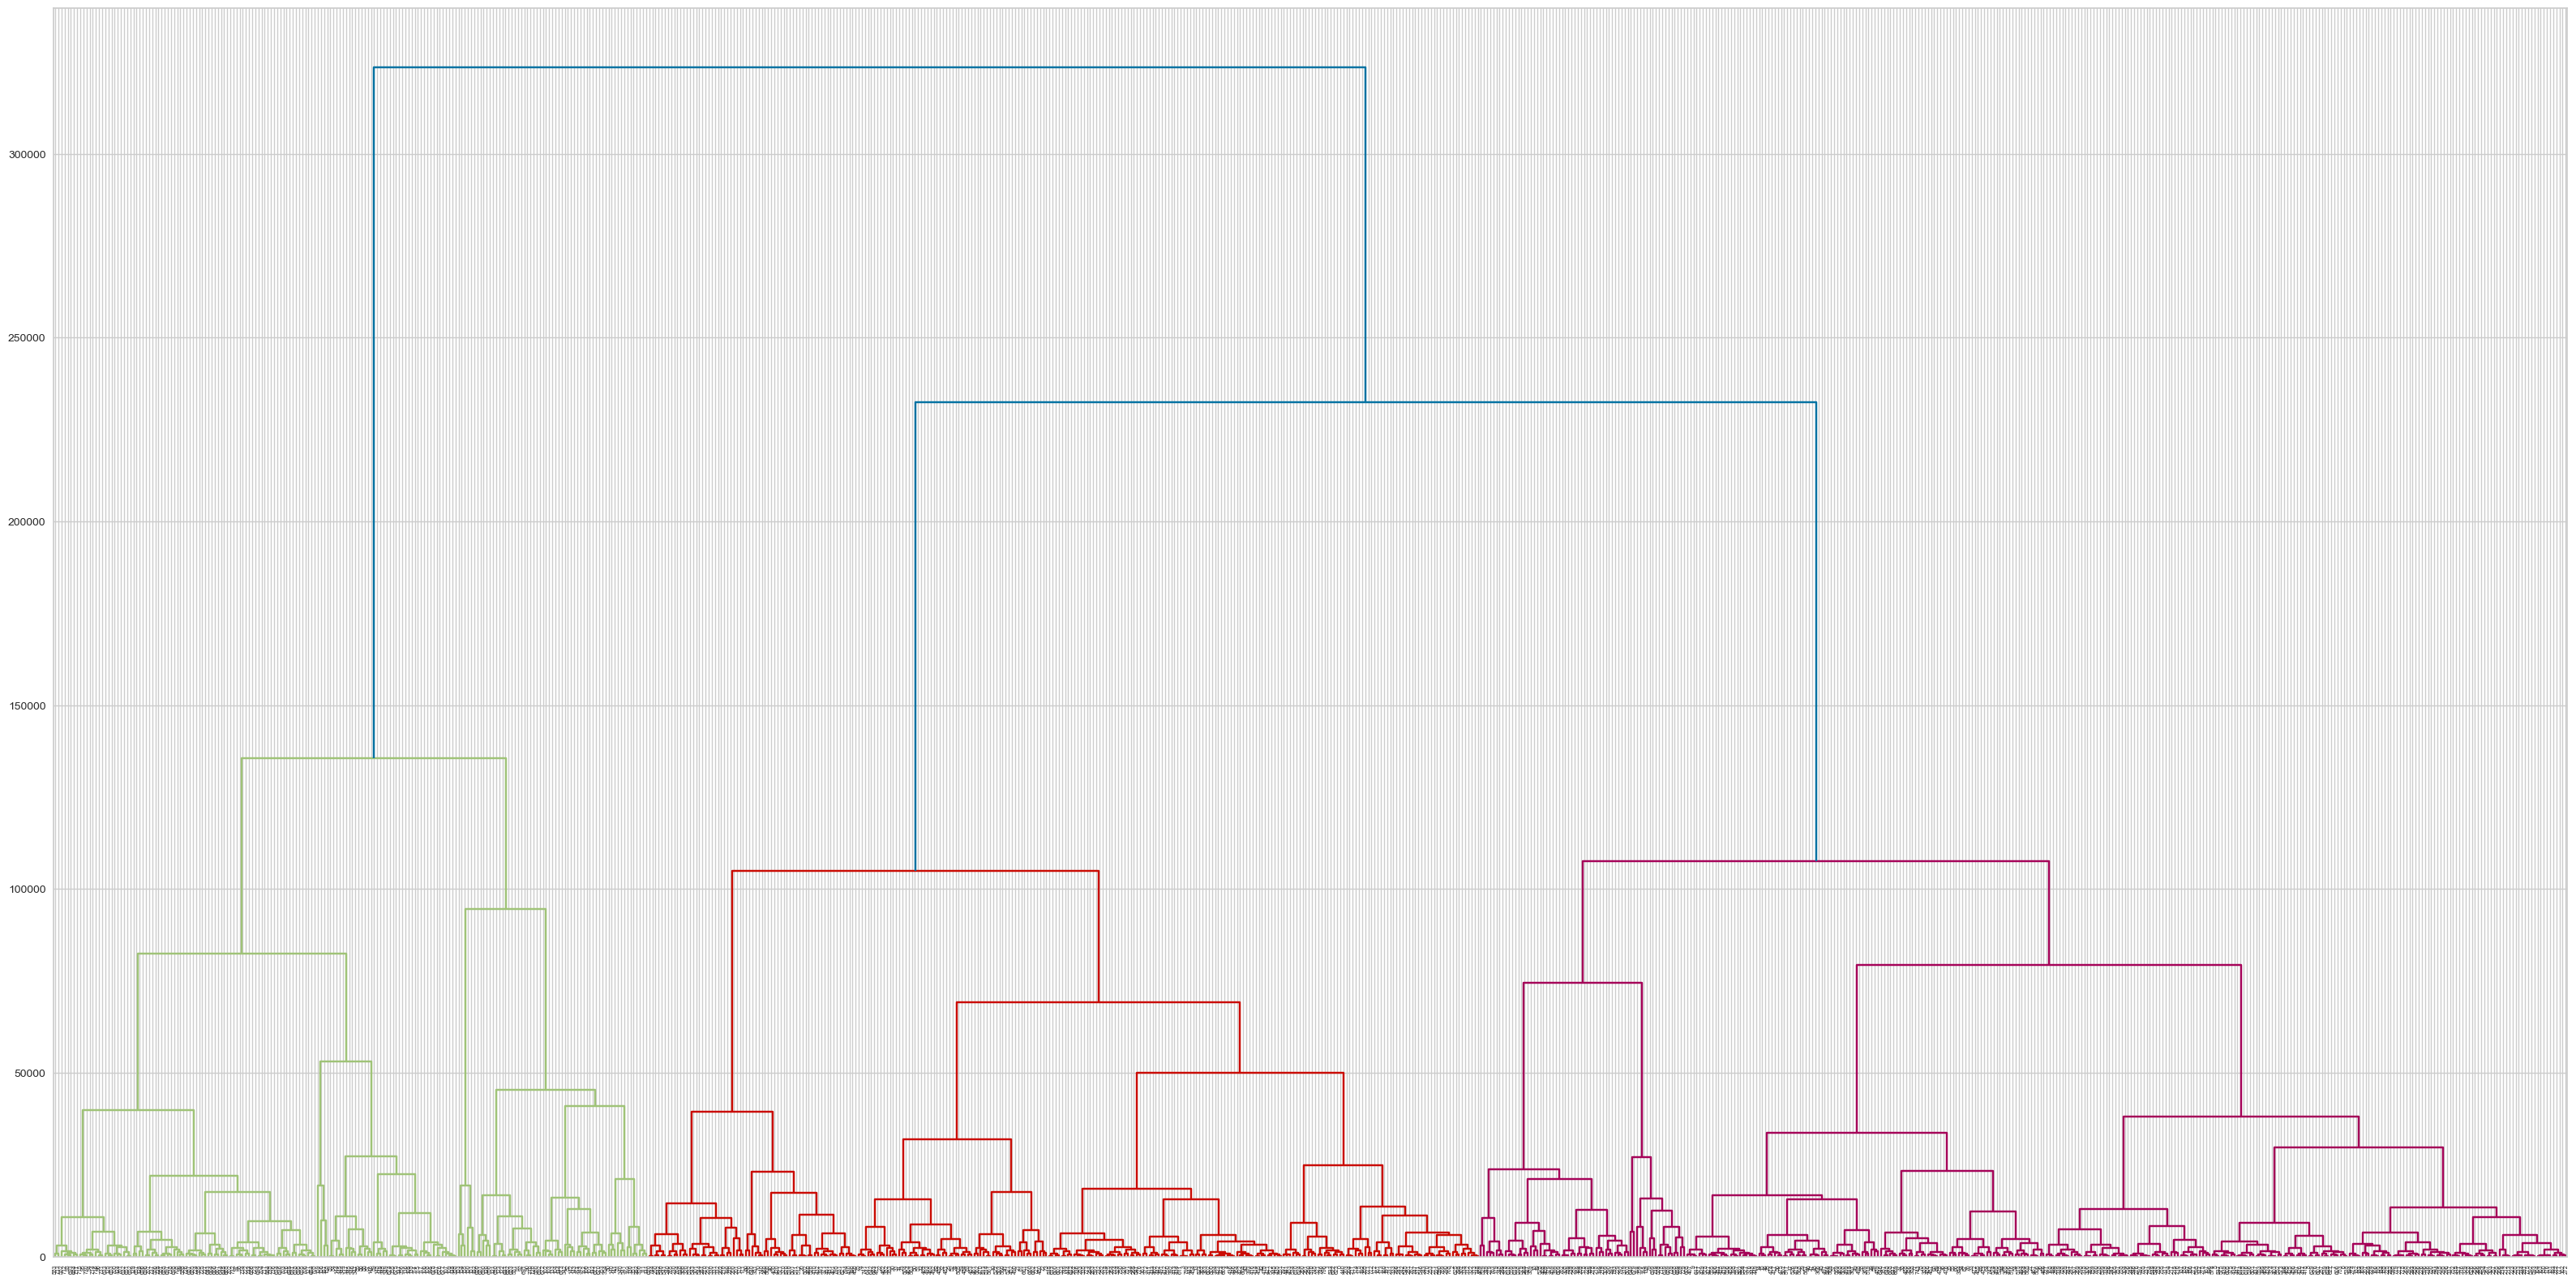

In [28]:
plt.figure(figsize=(40,20))
dendrogram(data)
plt.show()